University of Helsinki, Master's Programme in Mathematics and Statistics  
MAST32001 Computational Statistics, Autumn 2022   
Luigi Acerbi  
Based on notebook by Antti Honkela
# Lecture 2: Random number generators and simulating random numbers

Background reading: please see Chapter 2 of the "Course notes" available in Moodle.

## Important best practices

**Always set and save your random seed to make your experiments repeatable**

### 1. Simulating discrete distributions

Many statistical applications depend on generating random numbers with a specific distribution. We will return to the topic many times with increasingly complex methods, but before that we start simple.

1. Write a program to simulate a fair 6-sided die starting from a Uniform(0,1) random number generator (RNG) such as those provided by `numpy.random`. 
2. How many throws do you have to simulate to be reasonably sure (let's say ~95% probability) to get at least 10 6s? Write a computer program simulation to compute this approximately.
3. Write a program to simulate a biased coin with a specified bias `0 <= bias <= 1` using a Uniform(0,1) RNG, where `bias` is the probability of success (so `bias = 0.5` is an unbiased coin).
4. Simulate a coin flip competition between a person using a fair coin and a person using a biased coin where the competition consists of 100 coin flips. How large a bias do you need for the biased coin to lead to 95% probability of the person using the biased coin to obtain more heads than the person using the fair coin? What if you want 99% probability?

*Note*: In Python, `numpy.random` draws uniformly in the range $[0, 1)$ (i.e., 0 is included and 1 is excluded).

In [1]:
import numpy as np
import numpy.random as npr

# Did I mention to always set and save your random seed to make your experiments repeatable?
rng = npr.default_rng(41)

# Note that in older versions of NumPy, you would set the global random seed as follows, and it can still be done
# npr.seed(41) 

#1
def die_roll():
    """Return the outcome of a d6 (six-sided die) roll."""
    u = rng.random() # uniform random number between 0 and 1
    roll = 1 + np.floor(u*6.0) # convert to integer from 1 to 6
    return int(roll)

for i in range(10):
    print(die_roll())

6
5
1
5
6
3
4
4
3
4


In [2]:
# 2
throwcount = 10 # start with minimum 10 dice
num_reps = 1000 # you might need more simulations for better accuracy
while True:
    matches = 0
    for i in range(num_reps):
        if np.sum(np.array([die_roll() for i in range(throwcount)]) == 6) >= 10: # counts the number of 6s
            matches += 1
    if matches > 0.95*num_reps:
        break
    else:
        throwcount += 1
print("2)", throwcount, "throws needed")

2) 91 throws needed


In [3]:
#3
def biased_coin(bias, n_draws):
    """Return the outcome of n_draws biased coin flip."""
    return 1*(rng.random(n_draws)<bias)   # The outcome is bool, multiplying by 1 makes it integer

print("3)")
print(biased_coin(0.7,100))

3)
[0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1]


In [4]:
#4
# Consider that aim at each flip is to get 1
def bias_difference(prob,num_matches=100):
    """Compute bias needed for the biased coin person to win with probability prob over num_matches matches."""
    bias = 0.51
    num_reps = 5000
    while True:
        biased_wins = 0 # Initialize wins with biased coin
        # We redo the experiment num_reps times
        for i in range(num_reps):
            if np.sum(biased_coin(bias, num_matches))>np.sum(biased_coin(0.5, num_matches)):
                biased_wins+=1
        if biased_wins>=(prob*num_reps) or bias>=0.99:
            return round(bias,2) # round to two decimals
        else:
            bias += 0.01

print("4) 95% certainty:", bias_difference(0.95))
print("4) 99% certainty:", bias_difference(0.99))

4) 95% certainty: 0.62
4) 99% certainty: 0.67


### 2. Simulating continuous distributions with transformations

1. Derive and implement a method for sampling from the [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) $\mathrm{Exponential}(\lambda)$ using inverse cumulative density transformation (see course notes!).
2. Test your method by drawing 1000 samples with the values $\lambda = 0.1, 1, 10$. Compute the mean and standard deviation of the samples for each case. Plot a histogram of the samples together with the density and check if they match.
3. Implement a method for sampling from the normal distribution using Box-Muller transformation (See Sec. 2.2.1 of the course notes)
4. Test your method and plot the histogram of the samples together with the density and check if they match.
5. Check what is the largest value of a normally distributed random number that can be generated like this?

*Hints*: An example of how to use plotting is included below. You can use `plt.hist(..., density=True)` to plot a normalised histogram. Try to find a suitable number of bins to make the plot meaningful. You can view the documentation for the function `plt.hist` using the command: `? plt.hist`

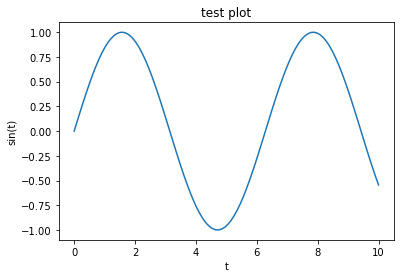

In [5]:
# Some hints for plotting.
# In order to plot simple functions with matplotlib and NumPy you can use
# Initialise plotting in the IPython/Jupyter notebook:
%matplotlib inline
import numpy as np  # import numpy, alias as np to save typying (common convention)
import matplotlib.pyplot as plt   # import matplotlib, alias as plt to save typing (common convention)

t = np.linspace(0, 10, 100)
plt.plot(t, np.sin(t))
plt.xlabel('t')
plt.ylabel('sin(t)')
plt.title('test plot')
plt.show()

In [6]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

#1 
# The Cumulative Density Function (CDF) for exponential distribution is 1-exp(-lambda*x).
# The inverse CDF is given by x = -log(1-y)/lambda
def exp_rvs(lambd, n_draws): #lambda is a keyword in Python so we use lambd to denote the parameter of exp dist.
    """Random samples from exponential distribution with parameter lambd."""
    y = npr.random(n_draws)
    draws = -np.log(1-y)/lambd
    return draws

exp_rvs(2.,10)

array([0.69259732, 0.46411749, 0.54663059, 0.28374424, 0.16351905,
       0.17998128, 0.09920651, 0.66720214, 0.3826035 , 0.60965804])

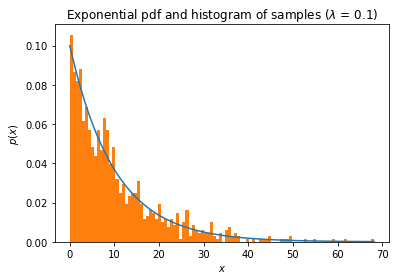

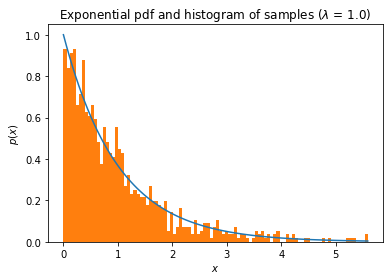

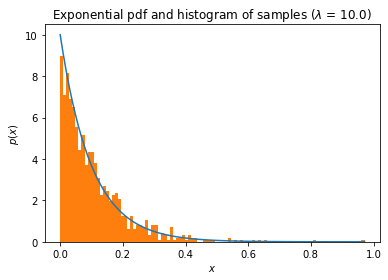

In [7]:
#2

%matplotlib inline

def exp_pdf(x, lambd):
    """Probability density function (pdf) of the exponential distribution."""
    return lambd*np.exp(-lambd*x)

def plot_exp(lambd):
    """Plot exponential pdf and histogram of random samples."""
    samples = exp_rvs(lambd,1000)    
    xx = np.linspace(0.0, np.max(samples), 100)
    plt.plot(xx, exp_pdf(xx, lambd))
    plt.hist(samples, bins=100, density=True)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$p(x)$')
    plt.title(r'Exponential pdf and histogram of samples ($\lambda$ = ' + str(lambd) + ')')
    plt.show()

plot_exp(0.1)
plot_exp(1.0)
plot_exp(10.0)

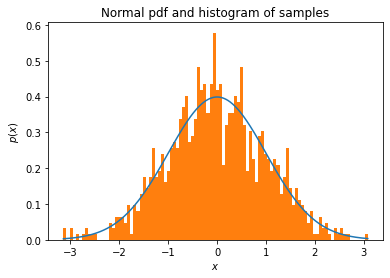

In [8]:
#3
def normal_rvs(mu, sigma, n_draws):
    """Random samples from normal distribution with parameters mu and sigma (Box-Muller transform)."""
    u1 = npr.random(n_draws)
    u2 = npr.random(n_draws)
    return sigma*np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)+mu

#4
def normal_pdf(x, mu, sigma):
    """Probability density function (pdf) of the normal distribution with parameters mu and sigma."""
    return np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)

draws = normal_rvs(0.0, 1.0, 1000)
x = np.linspace(np.min(draws), np.max(draws), 1000)
plt.plot(x, normal_pdf(x, 0.0, 1.0))
plt.hist(draws, bins=100, density=True)
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')
plt.title(r'Normal pdf and histogram of samples')
plt.show()

In [9]:
#5
# double has 53 bits for the fraction, therefore the smallest possible value is 2^-53
# the largest value of Box-Muller is obtained when u1 is smallest, which is approximately
print("5)", np.sqrt(-2*np.log(2**-53)))

5) 8.571674348652905


### 3. Basic rejection sampling

1. Design and implement rejection sampling for sampling from the density
$$ p(x) = 4x^3, \quad x \in [0, 1] $$
using the uniform distribution on the interval $[0,1]$ as the proposal.
2. Which value of $M$ can you use? How does the choice of $M$ affect the method?
3. Test your method and plot the generated samples together with the density and check that they match.

*Note*: Technically the uniform distribution in Python is defined for $x \in [0, 1)$, but we can typically ignore the fact that 1 is not included in the range. The probability of drawing any *specific* number in the range is so small - roughly equal to the precision of the number type, here `double` - that removing one number has no practical consequences. However, still be careful that 0 *is* included.

Acceptance rate: 0.2515786560668193


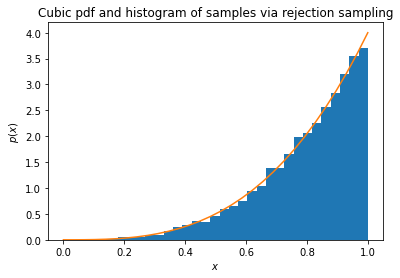

In [10]:
%matplotlib inline
import numpy.random as npr
import numpy as np
import matplotlib.pyplot as plt

def RejectionSampler(f_pdf, g_pdf, g_sample, M, N):
    """
    Returns N samples following pdf f_pdf() using proposal g(x)
    with pdf g_pdf() that can be sampled by g_sample().
    Requirement: f_pdf(x) <= M*g_pdf(x) for all x.
    """
    i = 0
    rejects = 0
    x = np.zeros(N)
    while i < N:
        x_prop = g_sample()
        u = npr.uniform(0, 1)
        if (u * M * g_pdf(x_prop)) < f_pdf(x_prop):
            # Accept the sample and record it
            x[i] = x_prop
            i += 1
        else:
            rejects += 1
    print("Acceptance rate:", N/(N+rejects))
    return x

M = 4 # Maximum of p(x) in the range
samples = RejectionSampler(lambda x: 4*x**3, lambda x: 1, npr.random, M, 10000)
plt.hist(samples, 30, density=True)
t = np.linspace(0, 1, 30)
plt.plot(t, 4*t**3)
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')
plt.title(r'Cubic pdf and histogram of samples via rejection sampling')
plt.show()


### 4. Mersenne Twister

The most popular random number generator is the Mersenne Twister, which is also used by Python (`random.random()`). It can be used to generate uniformly distributed integers in a given interval, which can be transformed to floating point numbers in a given interval.

1. Find the documentation of the Python random number generators.
2. Try `random.random()` and `numpy.random.random()` generators while setting the seed to a known value.
3. Test that you can recreate the same sequence of numbers by setting the seed to the same value.
4. Guess how many different random numbers you need to sample until you start seeing the same number repeated. Test your guess.  
  - *Hint*: If you are completely unsure about the guess, look up the "[birthday problem](https://en.wikipedia.org/wiki/Birthday_problem)". Think how many different numbers you can represent *uniformly* with double precision.
  - When testing with a large number of random numbers, you may have trouble such as running out of memory etc. It is advisable to increase the number of random samples you test relatively slowly (say by a factor of 2 at a time) to avoid starting runs that completely kill your computer for a long time.

In [11]:
#2
import numpy as np
import numpy.random as npr

# Alternative (more recent) way for setting the seed
rng = np.random.default_rng(123)
draws1 = rng.random(10)

#3
rng = np.random.default_rng(123)
draws2 = rng.random(10)
print(draws1==draws2)

#4
import random as rnd
# Here we use random.random to be sure we are using the Mersenne Twister

rnd.seed(123)
for i in range(20,30):
    print("Testing length", 2**i)
    
    draws3 = np.zeros(2**i)
    for j in range(0,2**i):
        draws3[j] = rnd.random()
    
    if len(np.unique(draws3)) != 2**i:
        print("Clash found at length " + str(2**i) + " (i = " + str(i) + ")")
        break

[ True  True  True  True  True  True  True  True  True  True]
Testing length 1048576
Testing length 2097152
Testing length 4194304
Testing length 8388608
Testing length 16777216
Testing length 33554432
Testing length 67108864
Clash found at length 67108864 (i = 26)


### *5. More advanced random number generators (optional)

The PCG family of RNGs claims to be superior to standard approaches such as Mersenne Twister, see http://www.pcg-random.org/

1. Read the description of the PCG generator and its features.
2. Find an implementation of the PCG generator and test it as above (*Hint*: recent versions of NumPy use the PCG generator as their default RNG stream).

In [12]:
import numpy as np

rng = np.random.default_rng(123)

for i in range(20,30):
    print("Testing length", 2**i)
    draws = rng.random(2**i)
    if len(np.unique(draws)) != 2**i:
        print("Clash found at length " + str(2**i) + " (i = " + str(i) + ")")
        break

Testing length 1048576
Testing length 2097152
Testing length 4194304
Testing length 8388608
Testing length 16777216
Testing length 33554432
Testing length 67108864
Testing length 134217728
Clash found at length 134217728 (i = 27)


### Bonus extra: BBC In Our Time podcast "Random and Pseudorandom"

http://www.bbc.co.uk/programmes/b00x9xjb